# Import Necessary Libraries

In [42]:
import pandas as pd
import numpy as np
import os

# Read and Concatenate Data

### Read 2022 Data

In [43]:
df = pd.DataFrame()
for i in range(12, 15):
    path = '2022/06/2022.06.' + str(i) + '/2022.06.' + str(i) + '.csv'
    df = pd.concat([df, pd.read_csv(path)], axis=0)

### Read 2021 Data

In [44]:
days = []
for i in range(1, 32):
    if i < 10:
        days.append('0' + str(i))
    else:
        days.append(str(i))
        
months = []
for i in range(1, 13):
    if i < 10:
        months.append('0' + str(i))
    else:
        months.append(str(i))

In [45]:
for month in months:
    for day in days:
        path = f'2021/{month}/2021.{month}.{day}/2021.{month}.{day}.csv'
        if os.path.exists(path):
            df = pd.concat([df, pd.read_csv(path)], axis=0)
            print(f"Added file 2021.{month}.{day}.csv to the dataframe")

Added file 2021.01.01.csv to the dataframe
Added file 2021.01.02.csv to the dataframe
Added file 2021.01.03.csv to the dataframe
Added file 2021.01.04.csv to the dataframe
Added file 2021.01.05.csv to the dataframe
Added file 2021.01.06.csv to the dataframe
Added file 2021.01.07.csv to the dataframe
Added file 2021.01.08.csv to the dataframe
Added file 2021.01.09.csv to the dataframe
Added file 2021.01.10.csv to the dataframe
Added file 2021.01.11.csv to the dataframe
Added file 2021.01.12.csv to the dataframe
Added file 2021.01.13.csv to the dataframe
Added file 2021.01.14.csv to the dataframe
Added file 2021.01.15.csv to the dataframe
Added file 2021.01.17.csv to the dataframe
Added file 2021.01.18.csv to the dataframe
Added file 2021.01.19.csv to the dataframe
Added file 2021.01.20.csv to the dataframe
Added file 2021.01.22.csv to the dataframe
Added file 2021.01.23.csv to the dataframe
Added file 2021.01.24.csv to the dataframe
Added file 2021.01.25.csv to the dataframe
Added file 

### Read 2020 Data

In [53]:
for month in months:
    for day in days:
        path = f'2020/{month}/2020.{month}.{day}/2020.{month}.{day}.csv'
        if os.path.exists(path):
            df = pd.concat([df, pd.read_csv(path)], axis=0)
            print(f"Added file 2020.{month}.{day}.csv to the dataframe")

Added file 2020.07.01.csv to the dataframe
Added file 2020.07.02.csv to the dataframe
Added file 2020.07.03.csv to the dataframe
Added file 2020.07.04.csv to the dataframe
Added file 2020.07.05.csv to the dataframe
Added file 2020.07.06.csv to the dataframe
Added file 2020.07.07.csv to the dataframe
Added file 2020.07.08.csv to the dataframe
Added file 2020.07.09.csv to the dataframe
Added file 2020.07.10.csv to the dataframe


# Data Exploration and Cleaning

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63992309 entries, 0 to 657758
Data columns (total 16 columns):
 #   Column         Dtype  
---  ------         -----  
 0   avg_ipt        float64
 1   bytes_in       int64  
 2   bytes_out      int64  
 3   dest_ip        int64  
 4   dest_port      float64
 5   entropy        float64
 6   num_pkts_out   int64  
 7   num_pkts_in    int64  
 8   proto          int64  
 9   src_ip         int64  
 10  src_port       float64
 11  time_end       int64  
 12  time_start     int64  
 13  total_entropy  float64
 14  label          object 
 15  duration       float64
dtypes: float64(6), int64(9), object(1)
memory usage: 8.1+ GB


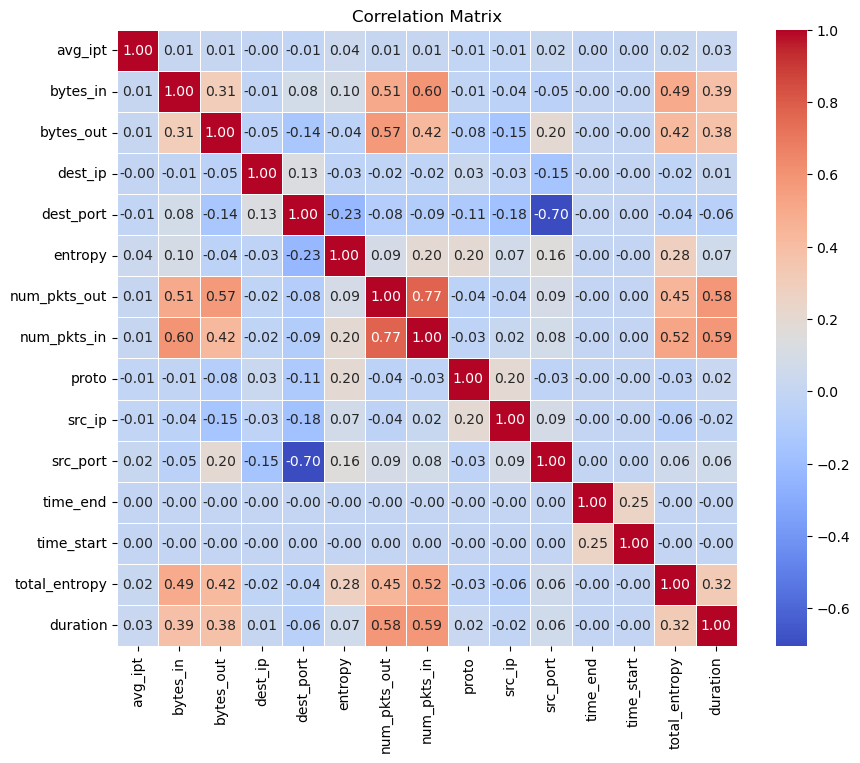

In [56]:
correlation_matrix = df.drop('label', axis=1).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

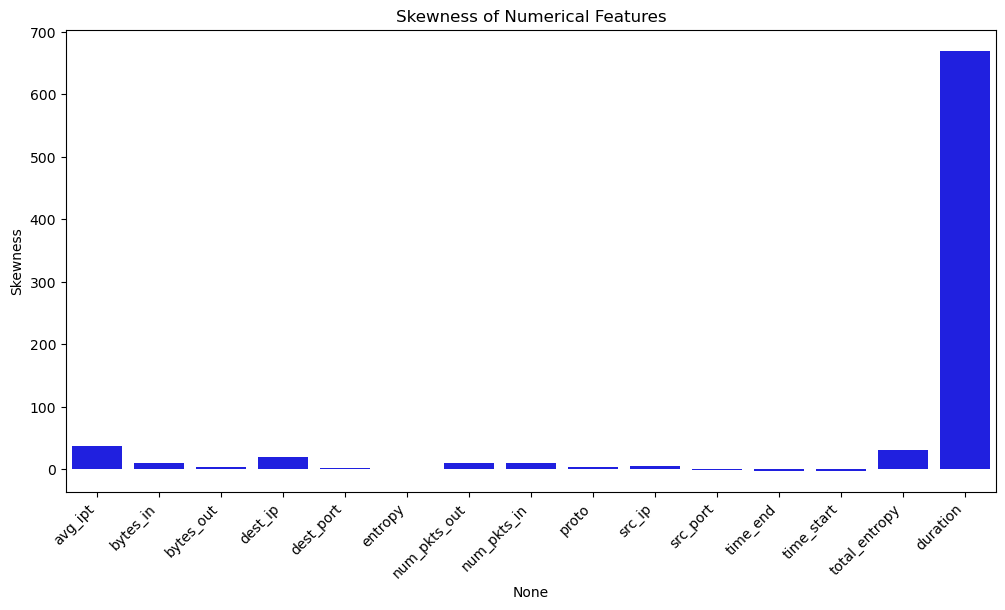

In [57]:
skewness = df.drop('label', axis=1).skew()
plt.figure(figsize=(12, 6))
sns.barplot(x=skewness.index, y=skewness.values, color='blue')
plt.xticks(rotation=45, ha='right')
plt.title('Skewness of Numerical Features')
plt.ylabel('Skewness')
plt.show()

In [58]:
missing_values = df.isnull().sum()
print(missing_values)

avg_ipt               0
bytes_in              0
bytes_out             0
dest_ip               0
dest_port        586438
entropy               0
num_pkts_out          0
num_pkts_in           0
proto                 0
src_ip                0
src_port         586438
time_end              0
time_start            0
total_entropy         0
label                 0
duration              0
dtype: int64


In [59]:
outliers = df['label'] == 'outlier'
df = df[~outliers]

In [60]:
df = df.drop(columns=['src_ip', 'dest_ip', 'time_start', 'time_end'])

In [61]:
df.dropna(axis=1, inplace = True)
missing_values = df.isnull().sum()

In [62]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])

In [63]:
from imblearn.under_sampling import RandomUnderSampler
X = df.drop('label', axis=1)
y = df['label']
rus = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)
df = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['label'])], axis=1)

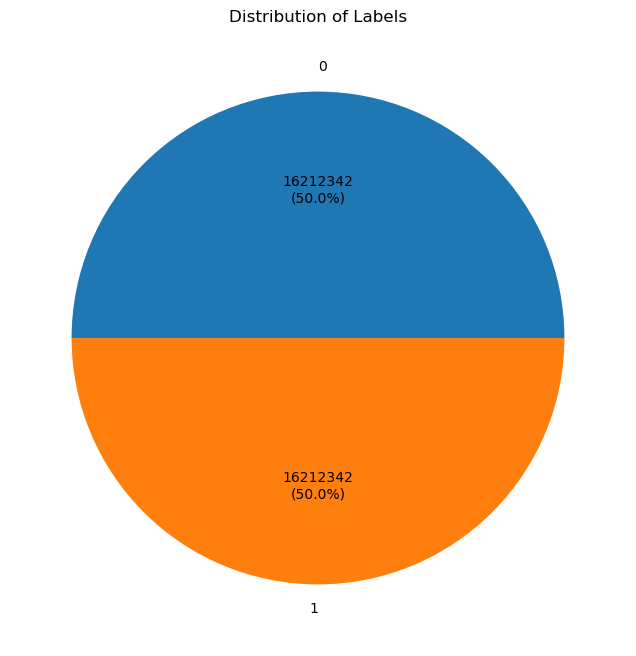

In [64]:
label_counts = df['label'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(label_counts, labels=label_counts.index, autopct=lambda p: '{:.0f}\n({:.1f}%)'.format(p * sum(label_counts) / 100, p))
plt.title('Distribution of Labels')
plt.show()

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
X = df.drop('label', axis=1)
y = df['label']
numerical_features = X.select_dtypes(include=['float64', 'int64']).columns
X[numerical_features] = np.log1p(X[numerical_features])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

In [66]:
df_processed = pd.concat([pd.DataFrame(X, columns=X.columns), pd.DataFrame(y, columns=['label'])], axis=1)

In [67]:
X_train

,avg_ipt,bytes_in,bytes_out,entropy,num_pkts_out,num_pkts_in,proto,total_entropy,duration
3309503,-0.614069,-0.735253,1.291170,-0.055359,0.988456,-0.877007,-0.060724,0.949168,-0.409116
304521,0.068980,1.201391,-0.099048,0.903327,-0.999442,-0.135259,3.180723,0.325842,-0.395052
460102,-0.614069,-0.735253,-1.392960,-1.602931,-0.999442,-0.877007,-0.060724,-1.613799,-0.409190
842862,-0.614069,-0.735253,-1.392960,-1.602931,0.211594,0.298636,-0.060724,-1.613799,2.625868
25607,-0.614069,-0.735253,-1.392960,-1.602931,-0.463550,-0.877007,-0.060724,-1.613799,-0.409083
...,...,...,...,...,...,...,...,...,...
69734,-0.614069,-0.735253,-1.392960,-1.602931,-0.999442,-0.135259,-0.060724,-1.613799,-0.409190
19903,-0.614069,-0.735253,1.156368,0.216408,0.452564,1.040384,-0.060724,0.902201,-0.408944
1068258,-0.614069,-0.735253,-1.392960,-1.602931,0.211594,0.298636,-0.060724,-1.613799,2.626483
299747,0.268450,1.201391,-0.099048,0.903327,-0.999442,-0.135259,3.180723,0.325842,-0.385732


In [68]:
y_train

3309503    0
304521     1
460102     0
842862     1
25607      0
          ..
69734      1
19903      0
1068258    1
299747     1
214122     1
Name: label, Length: 24318513, dtype: int64

# Machine Learning Model

In [29]:
# apply ensemble learning using 9 different classifiers (randomforest, svm, xgboost, adaboost, gradientboosting, knn, logistic regression, decision tree, and naive bayes)
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [31]:
# Initialize the classifiers
random_forest = RandomForestClassifier(random_state=42)
svm = SVC(random_state=42)
xgboost = XGBClassifier(random_state=42)
adaboost = AdaBoostClassifier(random_state=42)
gradientboost = GradientBoostingClassifier(random_state=42)
knn = KNeighborsClassifier()
logistic_regression = LogisticRegression(random_state=42)
decision_tree = DecisionTreeClassifier(random_state=42)
naive_bayes = GaussianNB()

In [33]:
# Train the classifiers
random_forest.fit(X_train, y_train)
print("Random Forest Classifier trained")
svm.fit(X_train, y_train)
print("SVM Classifier trained")
xgboost.fit(X_train, y_train)
print("XGBoost Classifier trained")
adaboost.fit(X_train, y_train)
print("AdaBoost Classifier trained")
gradientboost.fit(X_train, y_train)
print("Gradient Boosting Classifier trained")
knn.fit(X_train, y_train)
print("KNN Classifier trained")
logistic_regression.fit(X_train, y_train)
print("Logistic Regression Classifier trained")
decision_tree.fit(X_train, y_train)
print("Decision Tree Classifier trained")
naive_bayes.fit(X_train, y_train)
print("Naive Bayes Classifier trained")

Random Forest Classifier trained
SVM Classifier trained
XGBoost Classifier trained


/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Classifier trained
Gradient Boosting Classifier trained
KNN Classifier trained
Logistic Regression Classifier trained
Decision Tree Classifier trained
Naive Bayes Classifier trained


In [34]:
# Predict the target variable on the testing set
y_pred_rf = random_forest.predict(X_test)
y_pred_svm = svm.predict(X_test)
y_pred_xgboost = xgboost.predict(X_test)
y_pred_adaboost = adaboost.predict(X_test)
y_pred_gradientboost = gradientboost.predict(X_test)
y_pred_knn = knn.predict(X_test)
y_pred_logistic_regression = logistic_regression.predict(X_test)
y_pred_decision_tree = decision_tree.predict(X_test)
y_pred_naive_bayes = naive_bayes.predict(X_test)

In [35]:
# Calculate the accuracy, precision, recall, and F1 score for each classifier

# Random Forest Classifier
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
print(f"Random Forest Classifier: Accuracy = {accuracy_rf:.3f}, Precision = {precision_rf:.3f}, Recall = {recall_rf:.3f}, F1 Score = {f1_rf:.3f}")

# SVM Classifier
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
print(f"SVM Classifier: Accuracy = {accuracy_svm:.3f}, Precision = {precision_svm:.3f}, Recall = {recall_svm:.3f}, F1 Score = {f1_svm:.3f}")

# XGBoost Classifier
accuracy_xgboost = accuracy_score(y_test, y_pred_xgboost)
precision_xgboost = precision_score(y_test, y_pred_xgboost)
recall_xgboost = recall_score(y_test, y_pred_xgboost)
f1_xgboost = f1_score(y_test, y_pred_xgboost)
print(f"XGBoost Classifier: Accuracy = {accuracy_xgboost:.3f}, Precision = {precision_xgboost:.3f}, Recall = {recall_xgboost:.3f}, F1 Score = {f1_xgboost:.3f}")

# AdaBoost Classifier
accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)
precision_adaboost = precision_score(y_test, y_pred_adaboost)
recall_adaboost = recall_score(y_test, y_pred_adaboost)
f1_adaboost = f1_score(y_test, y_pred_adaboost)
print(f"AdaBoost Classifier: Accuracy = {accuracy_adaboost:.3f}, Precision = {precision_adaboost:.3f}, Recall = {recall_adaboost:.3f}, F1 Score = {f1_adaboost:.3f}")

# Gradient Boosting Classifier
accuracy_gradientboost = accuracy_score(y_test, y_pred_gradientboost)
precision_gradientboost = precision_score(y_test, y_pred_gradientboost)
recall_gradientboost = recall_score(y_test, y_pred_gradientboost)
f1_gradientboost = f1_score(y_test, y_pred_gradientboost)
print(f"Gradient Boosting Classifier: Accuracy = {accuracy_gradientboost:.3f}, Precision = {precision_gradientboost:.3f}, Recall = {recall_gradientboost:.3f}, F1 Score = {f1_gradientboost:.3f}")

# KNN Classifier
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)
print(f"KNN Classifier: Accuracy = {accuracy_knn:.3f}, Precision = {precision_knn:.3f}, Recall = {recall_knn:.3f}, F1 Score = {f1_knn:.3f}")

# Logistic Regression Classifier
accuracy_logistic_regression = accuracy_score(y_test, y_pred_logistic_regression)
precision_logistic_regression = precision_score(y_test, y_pred_logistic_regression)
recall_logistic_regression = recall_score(y_test, y_pred_logistic_regression)
f1_logistic_regression = f1_score(y_test, y_pred_logistic_regression)
print(f"Logistic Regression Classifier: Accuracy = {accuracy_logistic_regression:.3f}, Precision = {precision_logistic_regression:.3f}, Recall = {recall_logistic_regression:.3f}, F1 Score = {f1_logistic_regression:.3f}")

# Decision Tree Classifier
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
precision_decision_tree = precision_score(y_test, y_pred_decision_tree)
recall_decision_tree = recall_score(y_test, y_pred_decision_tree)
f1_decision_tree = f1_score(y_test, y_pred_decision_tree)
print(f"Decision Tree Classifier: Accuracy = {accuracy_decision_tree:.3f}, Precision = {precision_decision_tree:.3f}, Recall = {recall_decision_tree:.3f}, F1 Score = {f1_decision_tree:.3f}")

# Naive Bayes Classifier
accuracy_naive_bayes = accuracy_score(y_test, y_pred_naive_bayes)
precision_naive_bayes = precision_score(y_test, y_pred_naive_bayes)
recall_naive_bayes = recall_score(y_test, y_pred_naive_bayes)
f1_naive_bayes = f1_score(y_test, y_pred_naive_bayes)
print(f"Naive Bayes Classifier: Accuracy = {accuracy_naive_bayes:.3f}, Precision = {precision_naive_bayes:.3f}, Recall = {recall_naive_bayes:.3f}, F1 Score = {f1_naive_bayes:.3f}")

Random Forest Classifier: Accuracy = 0.932, Precision = 0.881, Recall = 0.998, F1 Score = 0.936
SVM Classifier: Accuracy = 0.924, Precision = 0.874, Recall = 0.990, F1 Score = 0.929
XGBoost Classifier: Accuracy = 0.932, Precision = 0.881, Recall = 0.998, F1 Score = 0.936
AdaBoost Classifier: Accuracy = 0.920, Precision = 0.870, Recall = 0.988, F1 Score = 0.926
Gradient Boosting Classifier: Accuracy = 0.925, Precision = 0.875, Recall = 0.993, F1 Score = 0.930
KNN Classifier: Accuracy = 0.932, Precision = 0.881, Recall = 0.998, F1 Score = 0.936
Logistic Regression Classifier: Accuracy = 0.890, Precision = 0.845, Recall = 0.957, F1 Score = 0.897
Decision Tree Classifier: Accuracy = 0.931, Precision = 0.881, Recall = 0.997, F1 Score = 0.935
Naive Bayes Classifier: Accuracy = 0.853, Precision = 0.838, Recall = 0.878, F1 Score = 0.857


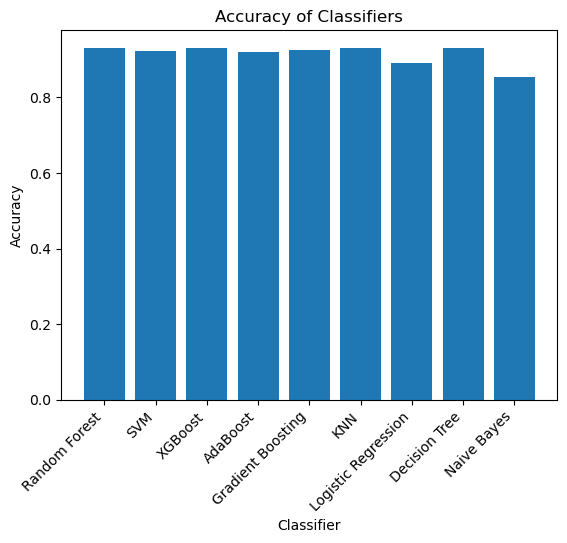

In [41]:
# compare the performance of the classifiers using accuracy on a bar chart
# Create a bar plot of accuracy for each classifier
classifiers = ['Random Forest', 'SVM', 'XGBoost', 'AdaBoost', 'Gradient Boosting', 'KNN', 'Logistic Regression', 'Decision Tree', 'Naive Bayes']
accuracies = [accuracy_rf, accuracy_svm, accuracy_xgboost, accuracy_adaboost, accuracy_gradientboost, accuracy_knn, accuracy_logistic_regression, accuracy_decision_tree, accuracy_naive_bayes]
plt.bar(classifiers, accuracies)
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Accuracy of Classifiers')
plt.xticks(rotation=45, ha='right')
plt.show()

In [36]:
# Take the average of all the predictions to create an ensemble prediction
y_pred_ensemble = (y_pred_rf + y_pred_svm + y_pred_xgboost + y_pred_adaboost + y_pred_gradientboost + y_pred_knn + y_pred_logistic_regression + y_pred_decision_tree + y_pred_naive_bayes) / 9
y_pred_ensemble = y_pred_ensemble.round()
# Print the ensemble prediction
print(y_pred_ensemble)

[0. 0. 0. ... 0. 1. 1.]


In [37]:
# Calculate the accuracy, precision, recall, and F1 score for the ensemble model
accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
precision_ensemble = precision_score(y_test, y_pred_ensemble)
recall_ensemble = recall_score(y_test, y_pred_ensemble)
f1_ensemble = f1_score(y_test, y_pred_ensemble)
print(f"Ensemble Model: Accuracy = {accuracy_ensemble:.3f}, Precision = {precision_ensemble:.3f}, Recall = {recall_ensemble:.3f}, F1 Score = {f1_ensemble:.3f}")

Ensemble Model: Accuracy = 0.929, Precision = 0.878, Recall = 0.996, F1 Score = 0.933


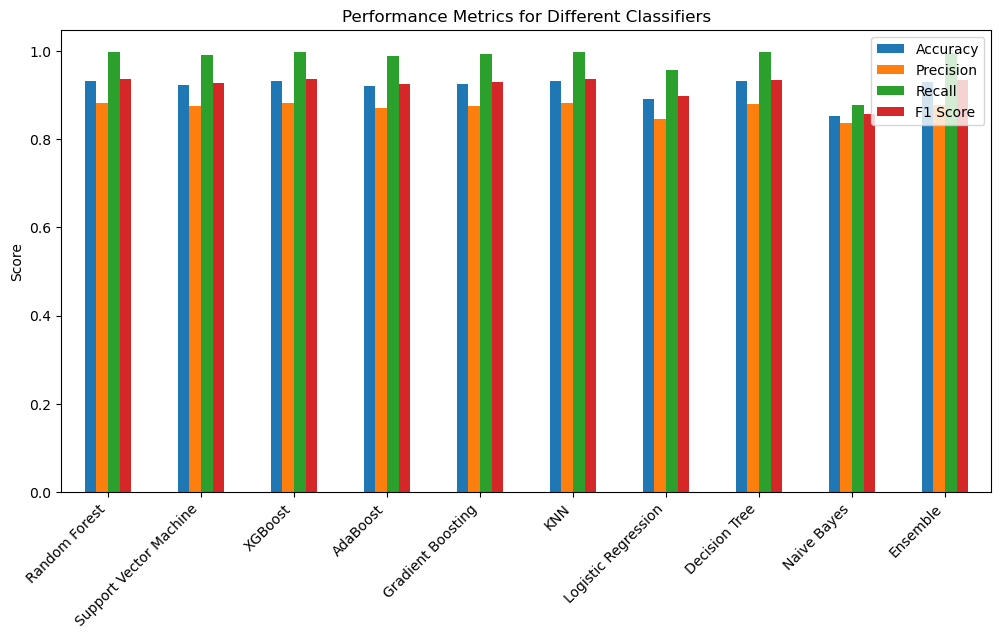

In [38]:
# compare the performance of the ensemble model with the individual classifiers using a bar plot
# Create a DataFrame with the metrics for each classifier
data = {
    'Accuracy': [accuracy_rf, accuracy_svm, accuracy_xgboost, accuracy_adaboost, accuracy_gradientboost, accuracy_knn, accuracy_logistic_regression, accuracy_decision_tree, accuracy_naive_bayes, accuracy_ensemble],
    'Precision': [precision_rf, precision_svm, precision_xgboost, precision_adaboost, precision_gradientboost, precision_knn, precision_logistic_regression, precision_decision_tree, precision_naive_bayes, precision_ensemble],
    'Recall': [recall_rf, recall_svm, recall_xgboost, recall_adaboost, recall_gradientboost, recall_knn, recall_logistic_regression, recall_decision_tree, recall_naive_bayes, recall_ensemble],
    'F1 Score': [f1_rf, f1_svm, f1_xgboost, f1_adaboost, f1_gradientboost, f1_knn, f1_logistic_regression, f1_decision_tree, f1_naive_bayes, f1_ensemble]
}
df = pd.DataFrame(data, index=['Random Forest', 'Support Vector Machine', 'XGBoost', 'AdaBoost', 'Gradient Boosting', 'KNN', 'Logistic Regression', 'Decision Tree', 'Naive Bayes', 'Ensemble'])
# Plot the metrics
df.plot(kind='bar', figsize=(12, 6))
plt.title('Performance Metrics for Different Classifiers')
plt.ylabel('Score')
plt.xticks(rotation=45, ha='right')
plt.show()

In [40]:
# save the classifiers to disk using joblib
import joblib
joblib.dump(random_forest, 'random_forest.joblib')
joblib.dump(svm, 'svm.joblib')
joblib.dump(xgboost, 'xgboost.joblib')
joblib.dump(adaboost, 'adaboost.joblib')
joblib.dump(gradientboost, 'gradientboost.joblib')
joblib.dump(knn, 'knn.joblib')
joblib.dump(logistic_regression, 'logistic_regression.joblib')
joblib.dump(decision_tree, 'decision_tree.joblib')
joblib.dump(naive_bayes, 'naive_bayes.joblib')

['naive_bayes.joblib']